# Import Library

In [49]:
!pip install imblearn

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score, accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import roc_curve, roc_auc_score

from imblearn.combine import SMOTEENN

# Data Wrangling

In [51]:
# Load Data
df = pd.read_csv('Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [53]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [54]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [55]:
df.shape

(7043, 21)

In [56]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [57]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].isnull().sum()

11

In [58]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())
df['TotalCharges'].isnull().sum()

0

In [59]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


# Data Analysis

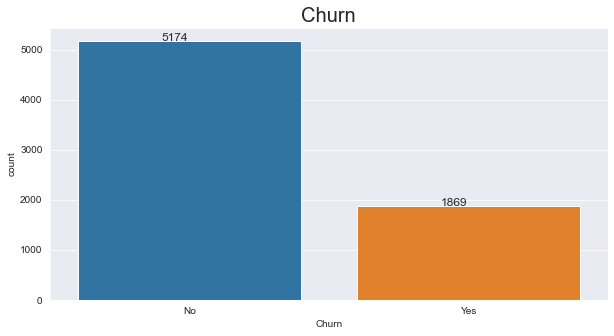

In [60]:
# Churn
plt.figure(figsize=(10,5))
sns.countplot(x='Churn', data=df)
plt.title('Churn', size=20)
for i in range(len(df['Churn'].value_counts())):
    plt.text(x=i-0.1, y=df['Churn'].value_counts()[i], s=df['Churn'].value_counts()[i], size=12)

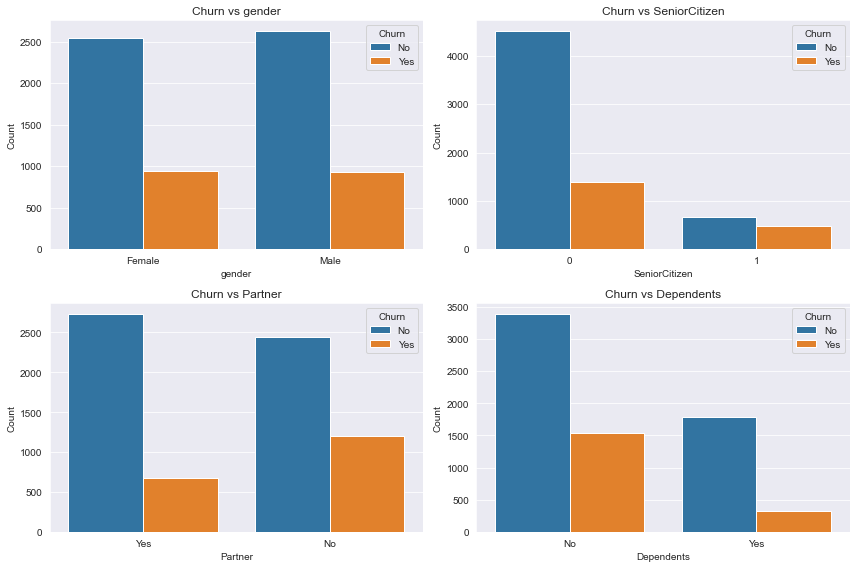

In [61]:
# gender, seniority, partner, dependents
cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

for i, ax in enumerate(axes.flat):
    if i < len(cols):
        sns.countplot(data=df, x=cols[i], hue='Churn', ax=ax)
        ax.set_title(f'Churn vs {cols[i]}')
        ax.set_xlabel(cols[i])
        ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

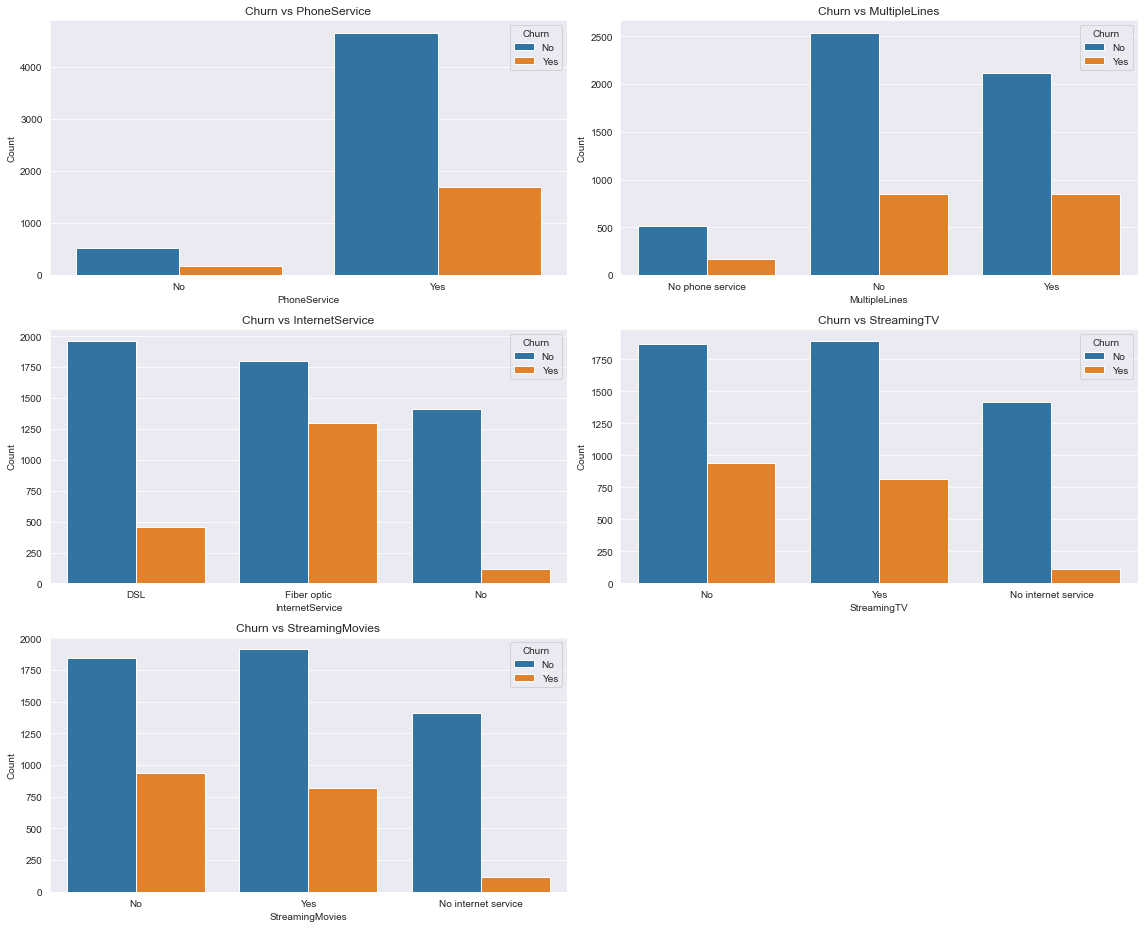

In [62]:
# Services countplot
services = df[['Churn', 'PhoneService', 'MultipleLines', 'InternetService','StreamingTV', 'StreamingMovies']]
cols = services.columns[1:]

fig, axes = plt.subplots(3, 2, figsize=(16,13))

for i, ax in enumerate(axes.flat):
    if i < len(cols):
        sns.countplot(data=services, x=cols[i], hue='Churn', ax=ax)
        ax.set_title(f'Churn vs {cols[i]}')
        ax.set_xlabel(cols[i])
        ax.set_ylabel('Count')
    else:
        fig.delaxes(ax)

plt.tight_layout()

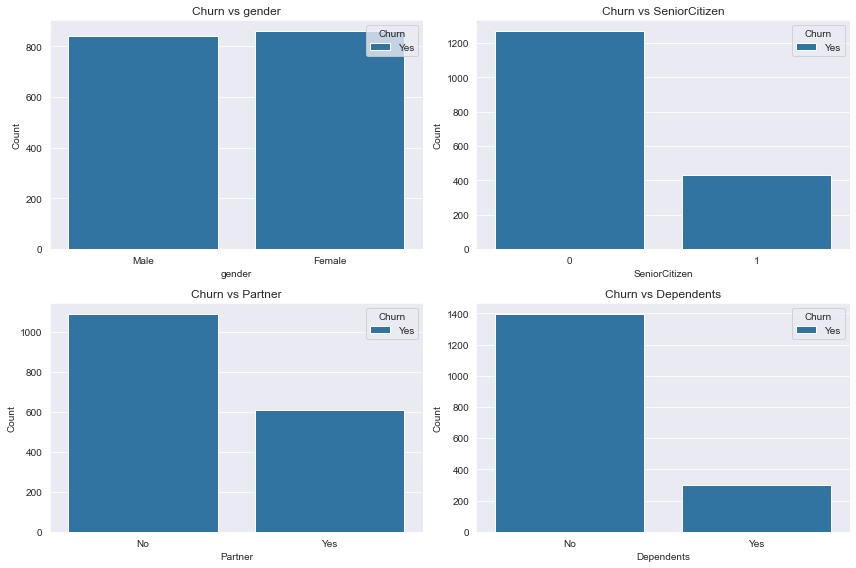

In [63]:
# phone service churn
phone_churn = df[(df['PhoneService']=='Yes') & (df['Churn']=='Yes')]

cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

for i, ax in enumerate(axes.flat):
    if i < len(cols):
        sns.countplot(data=phone_churn, x=cols[i], hue='Churn', ax=ax)
        ax.set_title(f'Churn vs {cols[i]}')
        ax.set_xlabel(cols[i])
        ax.set_ylabel('Count')

plt.tight_layout()

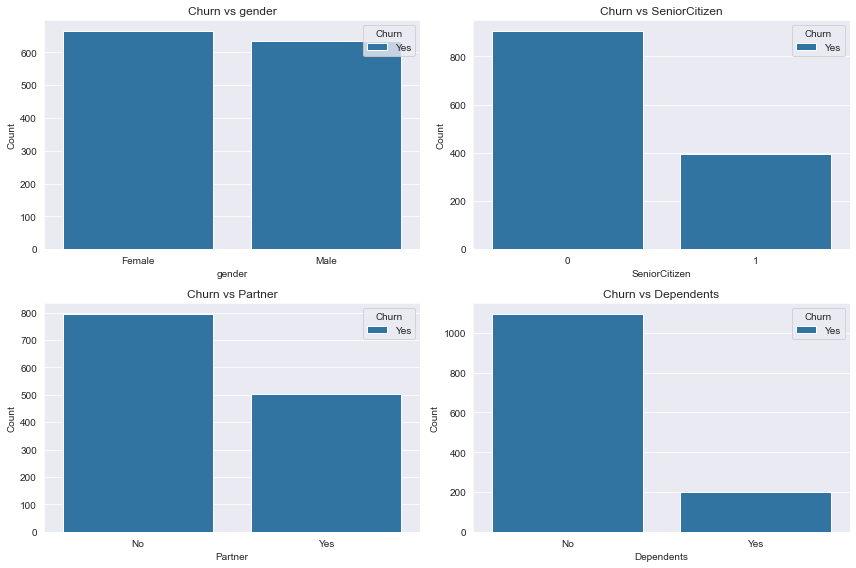

In [64]:
# Fiber Optic churn
fiber_churn = df[(df['InternetService']=='Fiber optic') & (df['Churn'] == 'Yes')]
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

for k, ax in enumerate(axes.flat):
    if k < len(cols):
        sns.countplot(data=fiber_churn, x=cols[k], hue='Churn', ax=ax)
        ax.set_title(f'Churn vs {cols[k]}')
        ax.set_xlabel(cols[k])
        ax.set_ylabel('Count')

plt.tight_layout()

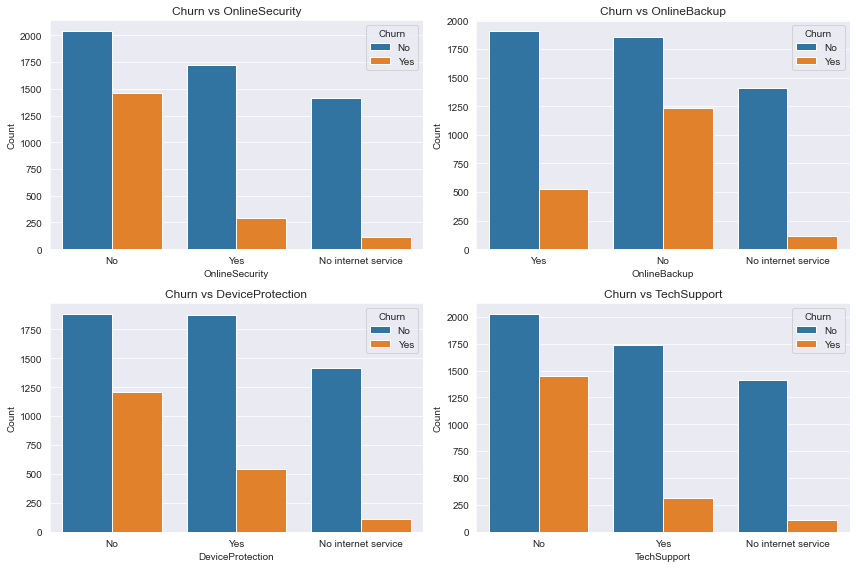

In [65]:
# security support
security_support = df[['Churn', 'OnlineSecurity', 'OnlineBackup','DeviceProtection', 'TechSupport']]
cols = security_support.columns[1:]

fig, axes = plt.subplots(2, 2, figsize=(12,8))

for i, ax in enumerate(axes.flat):
    if i < len(cols):
        sns.countplot(data=security_support, x=cols[i], hue='Churn', ax=ax)
        ax.set_title(f'Churn vs {cols[i]}')
        ax.set_xlabel(cols[i])
        ax.set_ylabel('Count')

plt.tight_layout()

<AxesSubplot:xlabel='Contract', ylabel='count'>

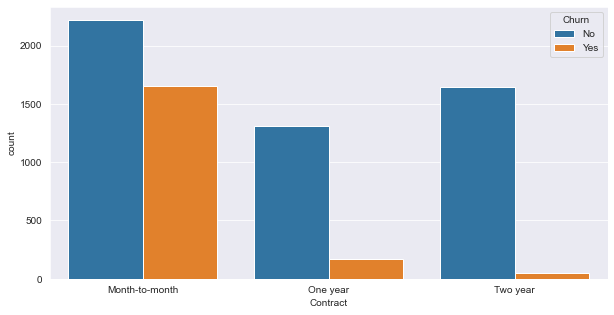

In [66]:
# contract type
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Contract', hue='Churn')

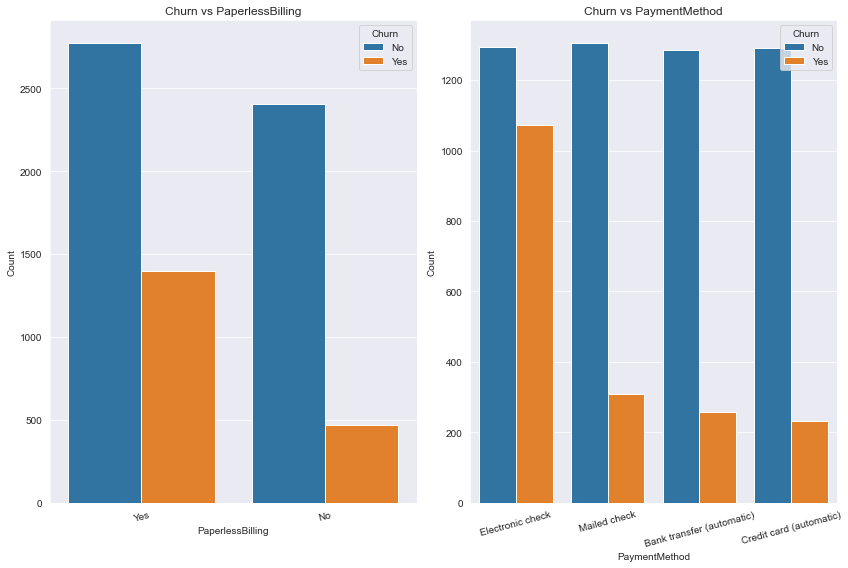

In [67]:
# Analisis churn berdasarkan paying options
paying_options = df[['Churn', 'PaperlessBilling', 'PaymentMethod']]
cols = paying_options.columns[1:]

fig, axes = plt.subplots(1, 2, figsize=(12,8))

for i, ax in enumerate(axes.flat):
    if i < len(cols):
        sns.countplot(data=paying_options, x=cols[i], hue='Churn', ax=ax)
        ax.set_title(f'Churn vs {cols[i]}')
        ax.set_xlabel(cols[i])
        ax.set_ylabel('Count')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=15)

plt.tight_layout()

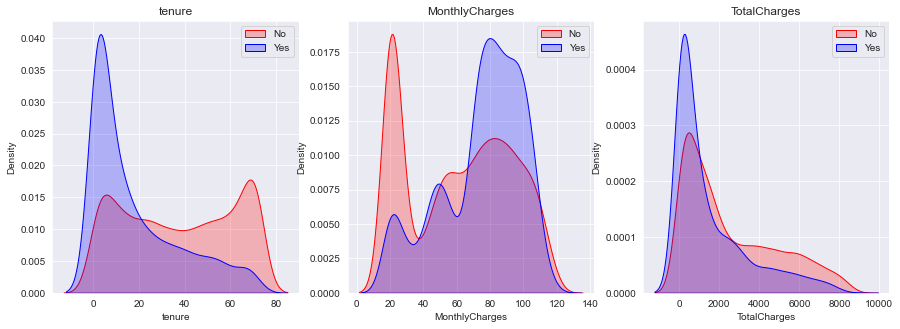

In [68]:
# tenure, monthly charges, total charges
numerical = ['tenure', 'MonthlyCharges', 'TotalCharges']
plt.figure(figsize=(15,5))
for i in range(len(numerical)):
    plt.subplot(1,3,i+1)
    sns.kdeplot(df[df['Churn']=='No'][numerical[i]], label='No', shade=True, color='r')
    sns.kdeplot(df[df['Churn']=='Yes'][numerical[i]], label='Yes', shade=True, color='b')
    plt.title(numerical[i])
    plt.legend()


# Data Training

In [69]:
df2 = df.drop(['customerID'], axis=1)
df2.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [70]:
# prepocessing data
for column in df2.columns:
    if df2[column].dtype == np.number:
        continue
    df2[column] = LabelEncoder().fit_transform(df2[column])
df2.head(100)

C:\Users\akmal\AppData\Local\Temp\ipykernel_16620\220799687.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df2[column].dtype == np.number:


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,12,1,2,1,2,0,0,0,0,0,0,1,2,78.95,927.35,1
96,1,0,1,1,71,1,2,0,2,2,0,2,0,0,1,1,1,66.85,4748.70,0
97,1,0,0,0,5,1,0,2,1,1,1,1,1,1,0,0,3,21.05,113.85,1
98,1,0,0,0,52,1,0,2,1,1,1,1,1,1,2,0,0,21.00,1107.20,0


In [71]:
df2.dtypes

gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges        float64
Churn                 int32
dtype: object

In [72]:
# ratio between retained and churned customers
churn_count = df2['Churn'].value_counts()
ratio = churn_count[0]/churn_count[1]
print(f'Ratio between retained and churned customers: {round(ratio, 2)}')

Ratio between retained and churned customers: 2.77


<AxesSubplot:>

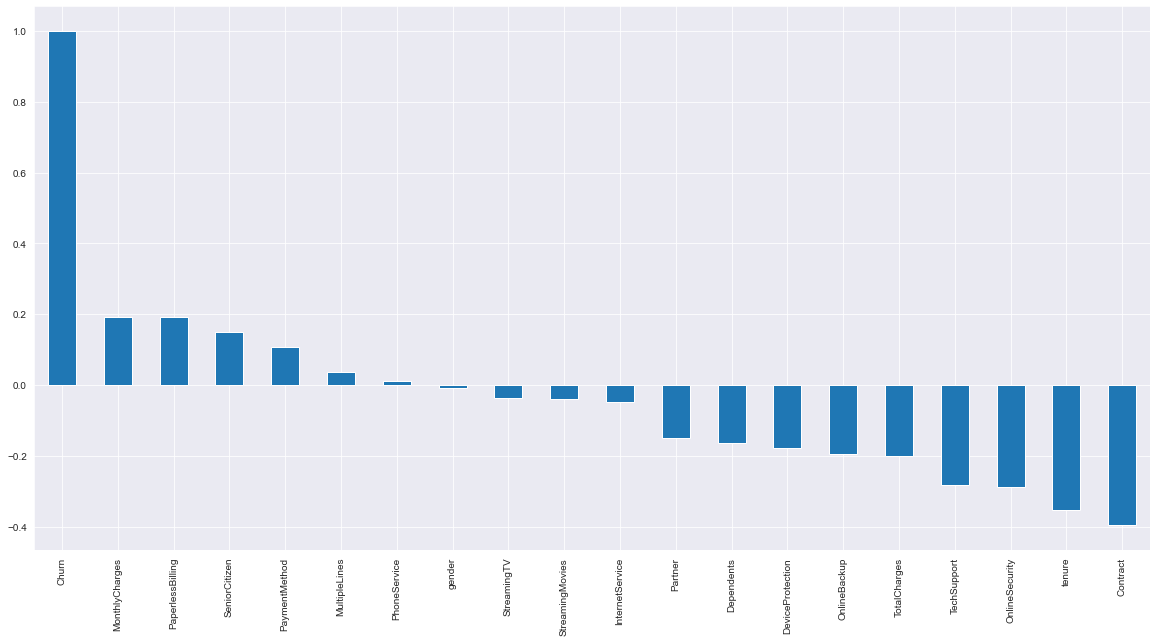

In [73]:
# Correlation between all columns and Churn
plt.figure(figsize=(20,10))
df2.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

In [74]:
x = df2.drop(['Churn'], axis=1)
y = df2['Churn']

In [75]:
x = StandardScaler().fit_transform(x)

In [76]:
sm = SMOTEENN(random_state=42)
x_resampled, y_resampled = sm.fit_resample(x, y)

In [77]:
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Logistic Regression

In [78]:
model = LogisticRegression(solver='liblinear')
model.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

In [79]:
prediction = model.predict(x_test)
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       570
           1       0.92      0.93      0.93       688

    accuracy                           0.92      1258
   macro avg       0.92      0.92      0.92      1258
weighted avg       0.92      0.92      0.92      1258



In [80]:
# accuracy, precision, recall, f1-score
print(f'Accuracy     : {round(accuracy_score(y_test, prediction), 4)*100}%')
print(f'Precision    : {round(precision_score(y_test, prediction), 4)*100}%')
print(f'Recall       : {round(recall_score(y_test, prediction), 4)*100}%')
print(f'F1-Score     : {round(f1_score(y_test, prediction), 4)*100}%')
print('Confusion Matrix : \n', confusion_matrix(y_test, prediction))

Accuracy     : 92.05%
Precision    : 92.12%
Recall       : 93.46%
F1-Score     : 92.78%
Confusion Matrix : 
 [[515  55]
 [ 45 643]]


In [81]:
# k-fold cross validation
kfold = KFold(shuffle=True)
accuracies = cross_val_score(estimator=model, X=x_train, y=y_train, cv=kfold)
print('Accuracy : {:.2f} %'.format(accuracies.mean()*100))
print('Standard Deviation : {:.2f} %'.format(accuracies.std()*100))

Accuracy : 91.43 %
Standard Deviation : 0.74 %


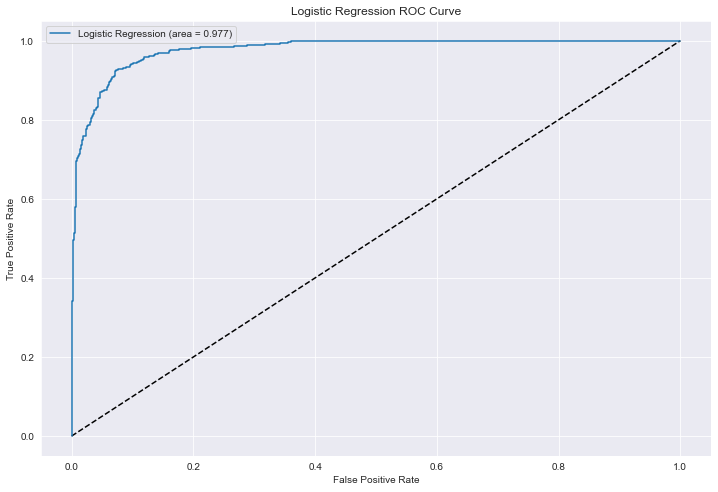

In [82]:
# ROC Curve
y_pred_prob = model.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_aur = roc_auc_score(y_test, y_pred_prob)
plt.figure(figsize=(12, 8))
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression (area = {:.3f})'.format(roc_aur))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('Logistic Regression ROC Curve')
plt.show()

## Random Forest

In [83]:
model2 = RandomForestClassifier()
model2.fit(x_train, y_train)

RandomForestClassifier()

In [84]:
prediction2 = model2.predict(x_test)
print(classification_report(y_test, prediction2))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       570
           1       0.96      0.97      0.97       688

    accuracy                           0.96      1258
   macro avg       0.96      0.96      0.96      1258
weighted avg       0.96      0.96      0.96      1258



In [85]:
# accuracy, precision, recall, f1-score
print(f'Accuracy     : {round(accuracy_score(y_test, prediction2), 4)*100}%')
print(f'Precision    : {round(precision_score(y_test, prediction2), 4)*100}%')
print(f'Recall       : {round(recall_score(y_test, prediction2), 4)*100}%')
print(f'F1-Score     : {round(f1_score(y_test, prediction2), 4)*100}%')
print('Confusion Matrix : \n', confusion_matrix(y_test, prediction2))

Accuracy     : 96.34%
Precision    : 96.39%
Recall       : 96.95%
F1-Score     : 96.67%
Confusion Matrix : 
 [[545  25]
 [ 21 667]]


In [86]:
# k-fold cross validation
kvold2 = KFold(shuffle=True)
accuracies2 = cross_val_score(estimator=model2, X=x_train, y=y_train, cv=kvold2)
print('Accuracy : {:.2f} %'.format(accuracies2.mean()*100))
print('Standard Deviation : {:.2f} %'.format(accuracies2.std()*100))

Accuracy : 95.62 %
Standard Deviation : 0.76 %


Text(0.5, 1.0, 'Random Forest ROC Curve')

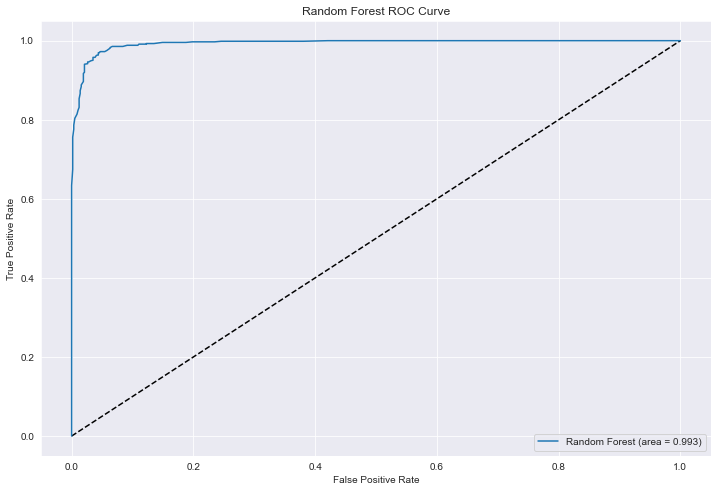

In [87]:
# ROC Curve
y_pred_prob2 = model2.predict_proba(x_test)[:,1]
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_pred_prob2)
roc_aur2 = roc_auc_score(y_test, y_pred_prob2)
plt.figure(figsize=(12, 8))
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr2, tpr2, label='Random Forest (area = {:.3f})'.format(roc_aur2))
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')

## Decision Tree

In [88]:
model3 = DecisionTreeClassifier(criterion='entropy')
model3.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [89]:
prediction3 = model3.predict(x_test)
print(classification_report(y_test, prediction3))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       570
           1       0.95      0.95      0.95       688

    accuracy                           0.95      1258
   macro avg       0.95      0.95      0.95      1258
weighted avg       0.95      0.95      0.95      1258



In [90]:
# accuracy, precision, recall, f1-score
print(f'Accuracy     : {round(accuracy_score(y_test, prediction3), 4)*100}%')
print(f'Precision    : {round(precision_score(y_test, prediction3), 4)*100}%')
print(f'Recall       : {round(recall_score(y_test, prediction3), 4)*100}%')
print(f'F1-Score     : {round(f1_score(y_test, prediction3), 4)*100}%')
print('Confusion Matrix : \n', confusion_matrix(y_test, prediction3))

Accuracy     : 94.83%
Precision    : 95.08%
Recall       : 95.49%
F1-Score     : 95.28999999999999%
Confusion Matrix : 
 [[536  34]
 [ 31 657]]


In [91]:
# k-fold cross validation
kfold3 = KFold(shuffle=True)
accuracies3 = cross_val_score(estimator=model3, X=x_train, y=y_train, cv=kfold3)
print('Accuracy : {:.2f} %'.format(accuracies3.mean()*100))
print('Standard Deviation : {:.2f} %'.format(accuracies3.std()*100))

Accuracy : 92.96 %
Standard Deviation : 0.93 %


Text(0.5, 1.0, 'Decision Tree ROC Curve')

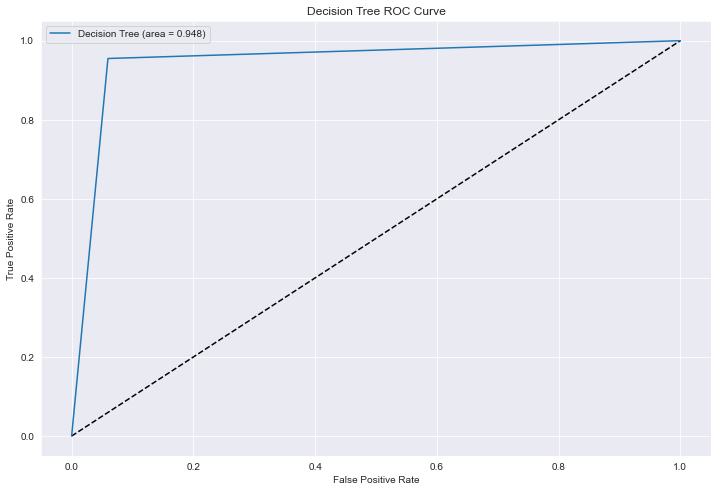

In [92]:
# ROC Curve
y_pred_prob3 = model3.predict_proba(x_test)[:,1]
fpr3, tpr3, thresholds3 = roc_curve(y_test, y_pred_prob3)
roc_aur3 = roc_auc_score(y_test, y_pred_prob3)
plt.figure(figsize=(12, 8))
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr3, tpr3, label='Decision Tree (area = {:.3f})'.format(roc_aur3))
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve')

## Perbandingan Model

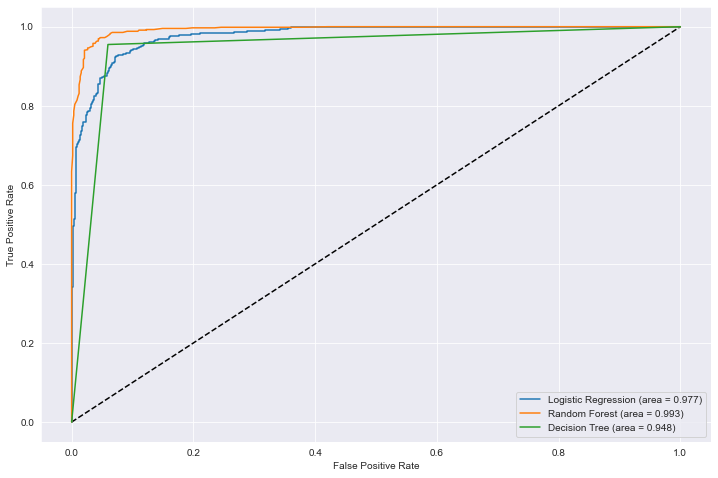

In [93]:
# ROC Curve comparison
plt.figure(figsize=(12, 8))
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression (area = {:.3f})'.format(roc_aur))
plt.plot(fpr2, tpr2, label='Random Forest (area = {:.3f})'.format(roc_aur2))
plt.plot(fpr3, tpr3, label='Decision Tree (area = {:.3f})'.format(roc_aur3))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

In [94]:
skor = pd.DataFrame({'Model': ['Logistic Regression', 'Random Forest', 'Decision Tree'], 'Accuracy': [round(accuracy_score(y_test, prediction), 4)*100, round(accuracy_score(y_test, prediction2), 4)*100, round(accuracy_score(y_test, prediction3), 4)*100]})
skor

,Model,Accuracy
0,Logistic Regression,92.05
1,Random Forest,96.34
2,Decision Tree,94.83


(0.0, 100.0)

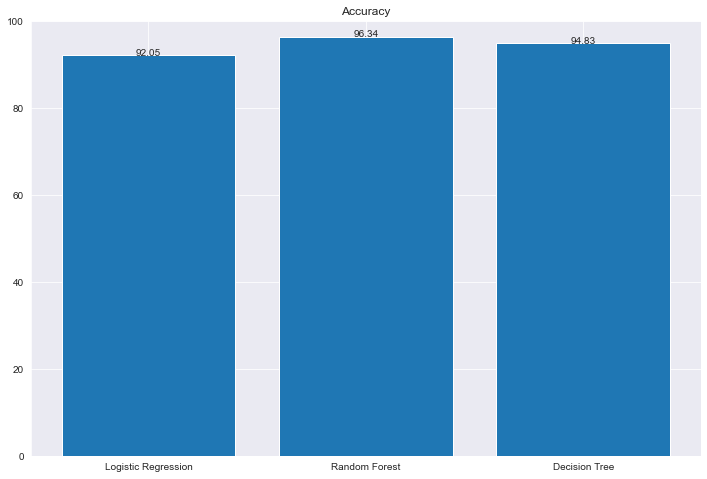

In [95]:
# Accuracy Comparison
plt.figure(figsize=(12, 8))
for i in range(len(skor['Model'])):
    plt.text(i, skor['Accuracy'][i], skor['Accuracy'][i], ha='center')
plt.bar(skor['Model'], skor['Accuracy'])
plt.title('Accuracy')
plt.ylim(0, 100)

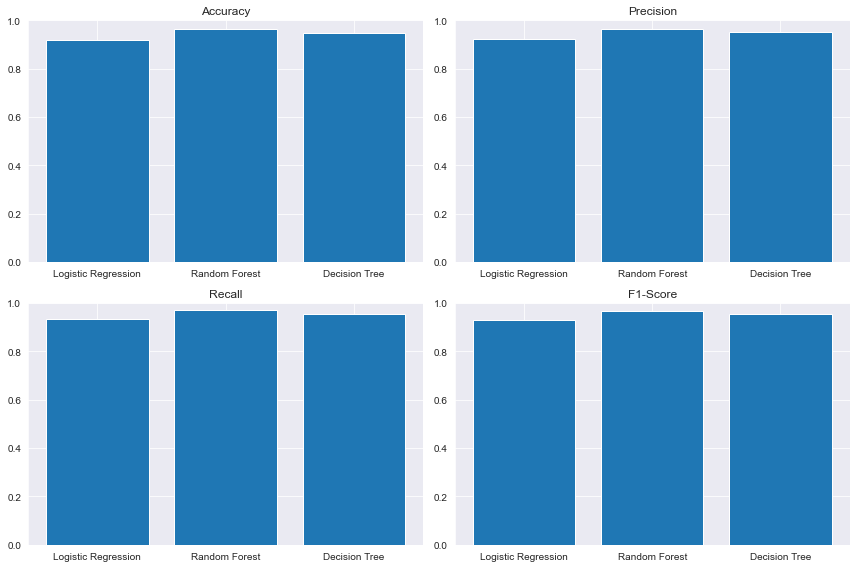

In [96]:
plt.figure(figsize=(12, 8))

# perbandingan akurasi
plt.subplot(2, 2, 1)
plt.bar(['Logistic Regression', 'Random Forest', 'Decision Tree'], [accuracy_score(y_test, prediction), accuracy_score(y_test, prediction2), accuracy_score(y_test, prediction3)])
plt.title('Accuracy')
plt.ylim(0, 1)

# perbandingan precision
plt.subplot(2, 2, 2)
plt.bar(['Logistic Regression', 'Random Forest', 'Decision Tree'], [precision_score(y_test, prediction), precision_score(y_test, prediction2), precision_score(y_test, prediction3)])
plt.title('Precision')
plt.ylim(0, 1)

# perbandingan recall
plt.subplot(2, 2, 3)
plt.bar(['Logistic Regression', 'Random Forest', 'Decision Tree'], [recall_score(y_test, prediction), recall_score(y_test, prediction2), recall_score(y_test, prediction3)])
plt.title('Recall')
plt.ylim(0, 1)

# perbandingan f1-score
plt.subplot(2, 2, 4)
plt.bar(['Logistic Regression', 'Random Forest', 'Decision Tree'], [f1_score(y_test, prediction), f1_score(y_test, prediction2), f1_score(y_test, prediction3)])
plt.title('F1-Score')
plt.ylim(0, 1)

plt.tight_layout()